<a href="https://colab.research.google.com/github/HaHyunkyung/Seoul_bus_station/blob/main/3_%EA%B5%AC%EB%B3%84_%EC%A3%BC%EB%AF%BC%EB%93%B1%EB%A1%9D%EC%9D%B8%EA%B5%AC_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울시 생활정보 기반 대중교통 수요 분석

<center>
<img src='https://drive.google.com/uc?id=1Nf_jhqGMXA8eRFVe0PbJXzkk1d6SbZK8' /></br>
</center>

---

# 목차
#### 1. 구별 버스정류장 분석
#### 2. 구별 유동 인구 분석
## 3. 구별 주민등록인구 분석 ✔
#### 4. 구별 업종 등록 분석

In [ ]:
%pip install pandas seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[기본 데이터]
* 1.3 seoul_people_202401.csv

[데이터 소개]
* 서울 시 주민 등록 데이터

[변수 소개]
* 한국인 / 등록 외국인 / 합계 / 세대수 / 고령인구수

# 1.데이터 불러오기

In [ ]:
import pandas as pd

seoul_people = pd.read_csv('/content/drive/MyDrive/[KT] 서울시 생활정보 기반 대중교통 수요 분석/실습/1.3 seoul_people_202401.csv', sep='\t', encoding='cp949')

In [ ]:
seoul_people.shape

(28, 14)

# 2.기본 정보 확인 및 클렌징

#### 기본 정보 확인하기

In [ ]:
seoul_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   동별(1)        28 non-null     object
 1   동별(2)        28 non-null     object
 2   2024         28 non-null     object
 3   2024    .1   28 non-null     object
 4   2024    .2   28 non-null     object
 5   2024    .3   28 non-null     object
 6   2024    .4   28 non-null     object
 7   2024    .5   28 non-null     object
 8   2024    .6   28 non-null     object
 9   2024    .7   28 non-null     object
 10  2024    .8   28 non-null     object
 11  2024    .9   28 non-null     object
 12  2024    .10  28 non-null     object
 13  2024    .11  28 non-null     object
dtypes: object(14)
memory usage: 3.2+ KB


In [ ]:
seoul_people.describe()

,동별(1),동별(2),2024,2024 .1,2024 .2,2024 .3,2024 .4,2024 .5,2024 .6,2024 .7,2024 .8,2024 .9,2024 .10,2024 .11
count,28,28,28,28,28,28,28,28,28,28,28,28,28,28
unique,2,27,28,28,28,28,28,28,28,28,28,27,23,28
top,합계,동별(2),세대 (세대),계 (명),계 (명),계 (명),한국인 (명),한국인 (명),한국인 (명),등록외국인 (명),등록외국인 (명),3225,1.97,65세이상고령자 (명)
freq,26,2,1,1,1,1,1,1,1,1,1,2,2,1


In [ ]:
seoul_people.head()

,동별(1),동별(2),2024,2024 .1,2024 .2,2024 .3,2024 .4,2024 .5,2024 .6,2024 .7,2024 .8,2024 .9,2024 .10,2024 .11
0,동별(1),동별(2),세대 (세대),계 (명),계 (명),계 (명),한국인 (명),한국인 (명),한국인 (명),등록외국인 (명),등록외국인 (명),등록외국인 (명),세대당인구 (명),65세이상고령자 (명)
1,동별(1),동별(2),소계,소계,남자,여자,소계,남자,여자,소계,남자,여자,소계,소계
2,합계,소계,4469417,9638799,4649446,4989353,9386034,4540031,4846003,252765,109415,143350,2.1,1743696
3,합계,종로구,72067,150453,71890,78563,139417,67306,72111,11036,4584,6452,1.93,28764
4,합계,중구,64714,131793,63495,68298,121312,58659,62653,10481,4836,5645,1.87,25920


In [ ]:
seoul_people.tail()

,동별(1),동별(2),2024,2024 .1,2024 .2,2024 .3,2024 .4,2024 .5,2024 .6,2024 .7,2024 .8,2024 .9,2024 .10,2024 .11
23,합계,관악구,284578,497883,249026,248857,481956,242651,239305,15927,6375,9552,1.69,85418
24,합계,서초구,169884,412078,196391,215687,407664,194291,213373,4414,2100,2314,2.4,65661
25,합계,강남구,239775,550282,262991,287291,544873,260520,284353,5409,2471,2938,2.27,86606
26,합계,송파구,285927,660025,316981,343044,654166,314347,339819,5859,2634,3225,2.29,108894
27,합계,강동구,203734,463318,226237,237081,459167,224423,234744,4151,1814,2337,2.25,82984


데이터 확인 및 처리

* 데이터가 세번째 줄부터 시작된다
* 서울시의 각 자치구별 남성, 여성 인구 수와 그 합계를 나타내는 데이터프레임 만들기

In [ ]:
seoul_people = pd.read_csv('/content/drive/MyDrive/[KT] 서울시 생활정보 기반 대중교통 수요 분석/실습/1.3 seoul_people_202401.csv', sep="\t", encoding = "cp949", header = 2)
seoul_people

,동별(1),동별(2),소계,소계.1,남자,여자,소계.2,남자.1,여자.1,소계.3,남자.2,여자.2,소계.4,소계.5
0,합계,소계,4469417,9638799,4649446,4989353,9386034,4540031,4846003,252765,109415,143350,2.10,1743696
1,합계,종로구,72067,150453,71890,78563,139417,67306,72111,11036,4584,6452,1.93,28764
2,합계,중구,64714,131793,63495,68298,121312,58659,62653,10481,4836,5645,1.87,25920
3,합계,용산구,107825,227106,109826,117280,213151,102312,110839,13955,7514,6441,1.98,39747
4,합계,성동구,133089,284766,137620,147146,277361,134519,142842,7405,3101,4304,2.08,49462
5,합계,광진구,170077,351180,167562,183618,335554,161277,174277,15626,6285,9341,1.97,56819
6,합계,동대문구,172801,359873,174120,185753,341149,167346,173803,18724,6774,11950,1.97,67030
7,합계,중랑구,188097,387470,189462,198008,382155,187372,194783,5315,2090,3225,2.03,78955
8,합계,성북구,196800,438168,208682,229486,425602,204171,221431,12566,4511,8055,2.16,80414
9,합계,강북구,143560,292977,141185,151792,288113,139514,148599,4864,1671,3193,2.01,68617


In [ ]:
# 서울시의 각 자치구별 남성, 여성 인구 수와 그 합계를 나타내는 데이터프레임 만들기
# 첫 번째 행 제거
# 동별(2)->자치구, 소계.1->합계

seoul_people = seoul_people[['동별(2)','남자','여자','소계.1']]
seoul_people = seoul_people.drop(0)
seoul_people.rename(columns={'동별(2)':'자치구','소계.1':'합계'}, inplace=True)
seoul_people

,자치구,남자,여자,합계
1,종로구,71890,78563,150453
2,중구,63495,68298,131793
3,용산구,109826,117280,227106
4,성동구,137620,147146,284766
5,광진구,167562,183618,351180
6,동대문구,174120,185753,359873
7,중랑구,189462,198008,387470
8,성북구,208682,229486,438168
9,강북구,141185,151792,292977
10,도봉구,149675,159819,309494


In [ ]:
seoul_people.to_csv("df_seoul_people.csv", index = False)

# 3.데이터 분석하기

In [ ]:
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


#### 데이터 분포 알아보기

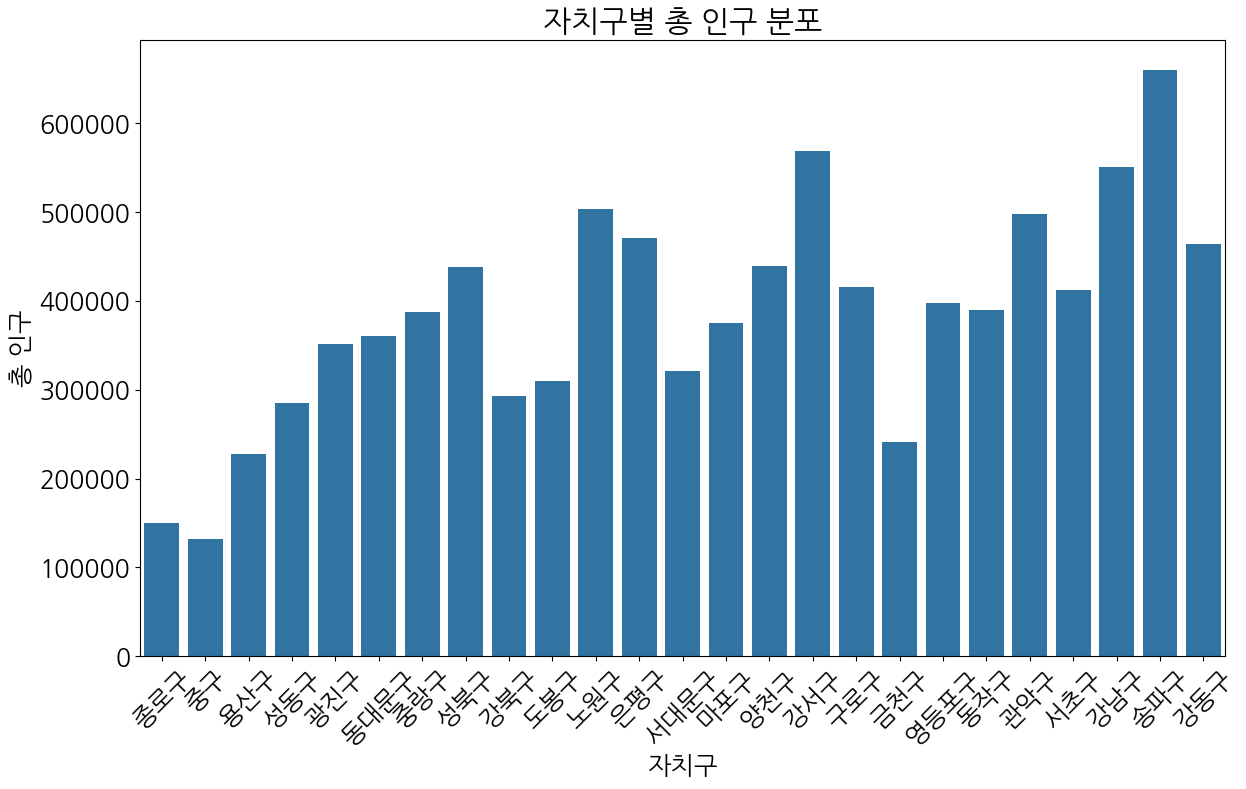

In [ ]:
# 자치구별 총 인구 분포, 자치구별 남녀 인구 비율, 서울시 전체 남녀 인구 비율
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 자치구별 인구 분포
plt.figure(figsize=(14, 8))
sns.barplot(x='자치구', y='합계', data=seoul_people)
plt.title('자치구별 총 인구 분포')
plt.xticks(rotation=45)
plt.ylabel('총 인구')
plt.xlabel('자치구')
plt.show()

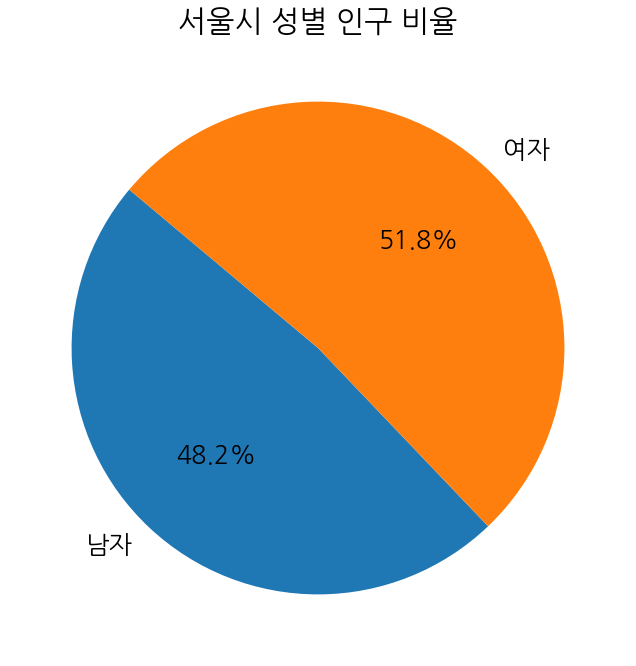

In [ ]:
# 전체 남성, 여성 인구 수 계산
total_male = seoul_people['남자'].astype(int).sum()
total_female = seoul_people['여자'].astype(int).sum()

# 2. 성별 인구 비율
plt.figure(figsize=(8, 8))
plt.pie([total_male, total_female], labels=['남자', '여자'], autopct='%1.1f%%', startangle=140)
plt.title('서울시 성별 인구 비율')
plt.show()

1. 인구 분포가 가장 많은 구
    1. 송파구
    2. 강서구
    3. 강남구

2. 인구 분포가 가장 적은 구
    1. 중구
    2. 종로구
    3. 용산구

3. 자치구별 성별 인구 차이가 가장 많은 구
    1. 마포구
    2. 송파구
    3. 강남구

4. 자치구별 성별 인구 차이가 가장 적은 구
    1. 금천구
    2. 관악구
    3. 중구

## 1. 자치구별 총 인구 분포
**인구 밀집 지역**

강남구와 송파구는 인구가 60만 명 이상으로 나타나, 상업 및 주거 중심지일 가능성이 크다.

**저인구 지역**

 반면, 종로구와 용산구는 상대적으로 낮은 인구 수치를 보여, 이들 지역은 상업적 중심지임에도 불구하고 주거 인구는 적을 수 있음을 시사한다.

**인구 분포의 균형**

 전체적으로 자치구 간 인구 분포의 균형이 어느 정도 이루어져 있으며, 일부 자치구는 인구가 집중되고 있다는 점에서, 도시 계획 및 자원 분배에 영향을 미칠 수 있다.

## 2. 성별 인구 비율

**여성 비율이 높음**

 서울시 전체 인구의 51.8%가 여성으로, 남성보다 약간 높은 비율을 보입니다. 이는 여성 인구가 남성 인구보다 많아, 사회적, 경제적 정책에서 성별 균형을 고려해야 함을 나타낸다.

**성비 균형**

 남성과 여성 간의 비율이 거의 비슷하지만, 여성이 살짝 우세한 점은 다양한 사회적 요인(예: 이주, 출산율 등)에 의해 영향을 받을 수 있다.

##3. 정책적 시사점

**주택 및 교통 정책**

 인구가 밀집된 자치구에 대해 주택 공급과 교통 인프라 확충이 필요할 수 있습니다. 이를 통해 인구 증가에 따른 문제를 예방할 수 있다.

---